In [1]:
from copy import deepcopy
import numpy as np

x = np.array([[1,1]])
y = np.array([[0]])

In [2]:
# initialize weight and bias values randomly

W = [
    np.array([[-0.0053, 0.3793], # 2x3 matrix
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), # bias of hidden layer
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, # 3x1 matrix
    np.array([-0.5516], dtype=np.float32) # bias of output layer
]

In [6]:
def feed_forward(inputs, outputs, weights):
    # calculate hidden layers
    pre_hidden = np.dot(inputs, weights[0]) + weights[1] # weight[0] (weight values) and weight[1] (bias terms)

    hidden = 1/(1+np.exp(-pre_hidden)) # apply non-linearity activation
    pred_out = np.dot(hidden, weights[2]) + weights[3] # calc output layer values

    # calc mean squared error value across dataset
    mean_squared_error = np.mean(np.square(pred_out - outputs))

    return mean_squared_error

In [4]:
def update_weights(inputs, outputs, weights, lr):

    # deepcopy to not change original weights
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # calculate loss value
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights): # loop through all layers of network
        for index, weight in np.ndenumerate(layer): # loop through each parameter within a given list
            temp_weights = deepcopy(weights) # reset to original set of weights since a different parameter is updated each iteration to calculate loss
            temp_weights[i][index] += 0.0001 # select its index weight present in ith layer and increase by small value
            _loss_plus = feed_forward(inputs, outputs, temp_weights) # compute new loss with the new set of weights
            grad = (_loss_plus - original_loss)/0.0001
            updated_weights[i][index] -= grad*lr
    
    return updated_weights, original_loss

In [7]:
# update weights over 100 epochs and fetch the loss value and the updated weight values
losses = []
for epoch in range(100):
    W, loss = update_weights(x, y, W, 0.01)
    losses.append(loss)

Text(0, 0.5, 'Loss value')

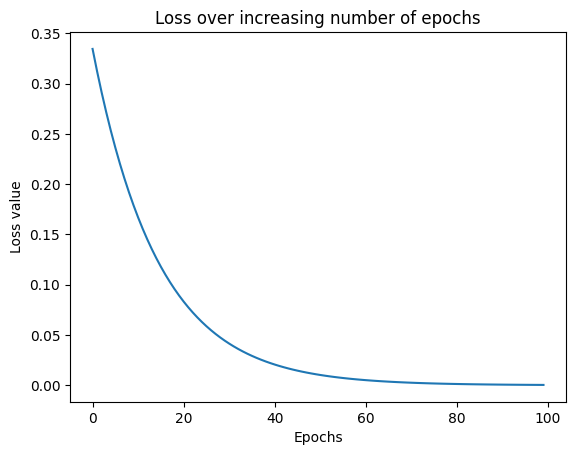

In [9]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Loss over increasing number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss value")

In [10]:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [ ]:
# once weights are updated, make predictions for the input by passing the input through the network and calc output val
pre_hidden = np.dot(x, W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
pred_out = np.dot(hidden, W[2]) + W[3]
pred_out # close to expected output 0

array([[-0.0174781]])